In [1]:
from IPython.display import clear_output
%cd /content/drive/MyDrive/collab_sandbox/learn_DL/dive_into_dl/2.0/

!pip install -U d2l

clear_output()

In [ ]:
!ls

data  Preliminaries.ipynb


# 2.1.1 Getting Started

In [ ]:
import torch

In [ ]:
x = torch.arange(12)
x

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [ ]:
torch.tensor([ 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [ ]:
x.shape

torch.Size([12])

In [ ]:
x.numel()

12

In [ ]:
x.reshape(3, 4)

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])

same operation

In [ ]:
x.reshape(3, -1)

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])

In [ ]:
torch.zeros((2, 3, 4))

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])

In [ ]:
torch.ones((2, 3, 4))

tensor([[[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]])

 Each of its elements is randomly sampled from a standard Gaussian (normal) distribution
with a mean of 0 and a standard deviation of 1.

In [ ]:
torch.randn(3, 4)

tensor([[-1.0873, -0.3280, -0.2824,  0.0063],
        [-0.9874, -1.5500,  0.6896,  0.1181],
        [ 0.0813, -0.8334,  0.6927, -2.3117]])

In [ ]:
torch.tensor([[2, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])

tensor([[2, 1, 4, 3],
        [1, 2, 3, 4],
        [4, 3, 2, 1]])

In [ ]:
x = torch.tensor([1.0, 2, 4, 8])
y = torch.tensor([2, 2, 2, 2])
print(x + y) 
print(x - y) 
print(x * y) # elementwise operation
print(x / y) 
print(x**y) # The ** operator is exponentiation

tensor([ 3.,  4.,  6., 10.])
tensor([-1.,  0.,  2.,  6.])
tensor([ 2.,  4.,  8., 16.])
tensor([0.5000, 1.0000, 2.0000, 4.0000])
tensor([ 1.,  4., 16., 64.])


In [ ]:
torch.exp(x)

tensor([2.7183e+00, 7.3891e+00, 5.4598e+01, 2.9810e+03])

In [ ]:
X = torch.arange(12, dtype=torch.float32).reshape((3, 4))
Y = torch.tensor([[2.0, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])
torch.cat((X, Y), dim=0), torch.cat((X, Y), dim=1)

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [ 2.,  1.,  4.,  3.],
         [ 1.,  2.,  3.,  4.],
         [ 4.,  3.,  2.,  1.]]),
 tensor([[ 0.,  1.,  2.,  3.,  2.,  1.,  4.,  3.],
         [ 4.,  5.,  6.,  7.,  1.,  2.,  3.,  4.],
         [ 8.,  9., 10., 11.,  4.,  3.,  2.,  1.]]))

In [ ]:
X == Y

tensor([[False,  True, False,  True],
        [False, False, False, False],
        [False, False, False, False]])

In [ ]:
X.sum()

tensor(66.)

In [ ]:
X[0:2, :] = 12
X

tensor([[12., 12., 12., 12.],
        [12., 12., 12., 12.],
        [ 8.,  9., 10., 11.]])

# 2.1.5 Saving Memory

In [ ]:
before = id(Y)
Y = Y + X
id(Y) == before

False

In [ ]:
Z = torch.zeros_like(Y)
print('id(Z):', id(Z))
Z[:] = X + Y
print('id(Z):', id(Z))


id(Z): 140061534958032
id(Z): 140061534958032


Or

In [ ]:
before = id(X)
X += Y
id(X) == before

True

# 2.1.6 Conversion to Other Python Objects

In [ ]:
A = X.numpy()
B = torch.from_numpy(A)
type(A), type(B)

(numpy.ndarray, torch.Tensor)

In [ ]:
X.numpy()

array([[26., 25., 28., 27.],
       [25., 26., 27., 28.],
       [20., 21., 22., 23.]], dtype=float32)

In [ ]:
a = torch.tensor([3.5])
a, a.item(), float(a), int(a)


(tensor([3.5000]), 3.5, 3.5, 3)

# 2.2 Data Preprocessing

In [ ]:
import os
os.makedirs(os.path.join('.', 'data'), exist_ok=True)
data_file = os.path.join('.', 'data', 'house_tiny.csv')
with open(data_file, 'w') as f:
  f.write('NumRooms,Alley,Price\n') # Column names
  f.write('NA,Pave,127500\n') # Each row represents a data example
  f.write('2,NA,106000\n')
  f.write('4,NA,178100\n')
  f.write('NA,NA,140000\n')

In [ ]:
import pandas as pd

data = pd.read_csv(data_file)
print(data)

   NumRooms Alley   Price
0       NaN  Pave  127500
1       2.0   NaN  106000
2       4.0   NaN  178100
3       NaN   NaN  140000


In [ ]:
inputs, outputs = data.iloc[:, 0:2], data.iloc[:, 2]
inputs = inputs.fillna(inputs.mean())
inputs

,NumRooms,Alley
0,3.0,Pave
1,2.0,NaN
2,4.0,NaN
3,3.0,NaN


In [ ]:
outputs

0    127500
1    106000
2    178100
3    140000
Name: Price, dtype: int64

In [ ]:
inputs = pd.get_dummies(inputs, dummy_na=True)
inputs

,NumRooms,Alley_Pave,Alley_nan
0,3.0,1,0
1,2.0,0,1
2,4.0,0,1
3,3.0,0,1


In [ ]:
import torch
X, y = torch.tensor(inputs.values), torch.tensor(outputs.values)
X, y

(tensor([[3., 1., 0.],
         [2., 0., 1.],
         [4., 0., 1.],
         [3., 0., 1.]], dtype=torch.float64),
 tensor([127500, 106000, 178100, 140000]))

# 2.3 Linear Algebra

### 2.3.1 Scalars

In [ ]:
import torch
x = torch.tensor(3.0)
y = torch.tensor(2.0)
x + y, x * y, x / y, x**y

(tensor(5.), tensor(6.), tensor(1.5000), tensor(9.))

### 2.3.2 Vectors


In [ ]:
x = torch.arange(4)
x

tensor([0, 1, 2, 3])

In [ ]:
len(x)

4

In [ ]:
x.shape

torch.Size([4])

### 2.3.3 Matrices

In [ ]:
A = torch.arange(20).reshape(5, 4)
A

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11],
        [12, 13, 14, 15],
        [16, 17, 18, 19]])

In [ ]:
A = torch.arange(20).reshape(5, -1)
A

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11],
        [12, 13, 14, 15],
        [16, 17, 18, 19]])

In [ ]:
A.T

tensor([[ 0,  4,  8, 12, 16],
        [ 1,  5,  9, 13, 17],
        [ 2,  6, 10, 14, 18],
        [ 3,  7, 11, 15, 19]])

B is simmetric 

In [ ]:
B = torch.tensor([[1, 2, 3], [2, 0, 4], [3, 4, 5]])
B

tensor([[1, 2, 3],
        [2, 0, 4],
        [3, 4, 5]])

In [ ]:
B == B.T

tensor([[True, True, True],
        [True, True, True],
        [True, True, True]])

### 2.3.4 Tensors

tensors is just n-dimensional matrices.

Tensors will become more important when we start working with images, which arrive as ndimensional arrays with 3 axes corresponding to the height, width, and a channel axis for stacking
the color channels (red, green, and blue).

In [ ]:
X = torch.arange(24).reshape(2, 3, 4)
X

tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]],

        [[12, 13, 14, 15],
         [16, 17, 18, 19],
         [20, 21, 22, 23]]])

### 2.3.5 Basic Properties of Tensor Arithmetic

In [ ]:
A = torch.arange(20, dtype=torch.float32).reshape(5, 4)
B = A.clone() # Assign a copy of `A` to `B` by allocating new memory
A

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.],
        [12., 13., 14., 15.],
        [16., 17., 18., 19.]])

In [ ]:
 A + B

tensor([[ 0.,  2.,  4.,  6.],
        [ 8., 10., 12., 14.],
        [16., 18., 20., 22.],
        [24., 26., 28., 30.],
        [32., 34., 36., 38.]])

Hadamard product (math
notation ⊙

In [ ]:
A * B

tensor([[  0.,   1.,   4.,   9.],
        [ 16.,  25.,  36.,  49.],
        [ 64.,  81., 100., 121.],
        [144., 169., 196., 225.],
        [256., 289., 324., 361.]])

In [ ]:
a = 2
X = torch.arange(24).reshape(2, 3, 4)
X

tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]],

        [[12, 13, 14, 15],
         [16, 17, 18, 19],
         [20, 21, 22, 23]]])

In [ ]:
a + X

tensor([[[ 2,  3,  4,  5],
         [ 6,  7,  8,  9],
         [10, 11, 12, 13]],

        [[14, 15, 16, 17],
         [18, 19, 20, 21],
         [22, 23, 24, 25]]])

In [ ]:
type(X.shape[-1])

int

### 2.3.6 Reduction

In [ ]:
x = torch.arange(4, dtype=torch.float32)
x, x.sum()


(tensor([0., 1., 2., 3.]), tensor(6.))

In [ ]:
A

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.],
        [12., 13., 14., 15.],
        [16., 17., 18., 19.]])

In [ ]:
A.shape, A.sum()

(torch.Size([5, 4]), tensor(190.))

In [ ]:
A_sum_axis0 = A.sum(axis=0)
A_sum_axis0, A_sum_axis0.shape


(tensor([40., 45., 50., 55.]), torch.Size([4]))

In [ ]:
A_sum_axis1 = A.sum(axis=1)
A_sum_axis1, A_sum_axis1.shape

(tensor([ 6., 22., 38., 54., 70.]), torch.Size([5]))

In [ ]:
A.mean(), A.sum() / A.numel()

(tensor(9.5000), tensor(9.5000))

In [ ]:
A.mean(axis=0), A.sum(axis=0) / A.shape[0]

(tensor([ 8.,  9., 10., 11.]), tensor([ 8.,  9., 10., 11.]))

In [ ]:
sum_A = A.sum(axis=1, keepdims=True)
sum_A

tensor([[ 6.],
        [22.],
        [38.],
        [54.],
        [70.]])

In [ ]:
A / sum_A

tensor([[0.0000, 0.1667, 0.3333, 0.5000],
        [0.1818, 0.2273, 0.2727, 0.3182],
        [0.2105, 0.2368, 0.2632, 0.2895],
        [0.2222, 0.2407, 0.2593, 0.2778],
        [0.2286, 0.2429, 0.2571, 0.2714]])

In [ ]:
A

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.],
        [12., 13., 14., 15.],
        [16., 17., 18., 19.]])

In [ ]:
A.cumsum(axis=0)

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  6.,  8., 10.],
        [12., 15., 18., 21.],
        [24., 28., 32., 36.],
        [40., 45., 50., 55.]])

### 2.3.7 Dot Products

In [ ]:
y = torch.ones(4, dtype=torch.float32)

In [ ]:
x

tensor([0., 1., 2., 3.])

In [ ]:
torch.dot(x, y)

tensor(6.)

In [ ]:
torch.sum(x * y)

tensor(6.)

### 2.3.8 Matrix-Vector Products

In [ ]:
x

tensor([0., 1., 2., 3.])

In [ ]:
A

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.],
        [12., 13., 14., 15.],
        [16., 17., 18., 19.]])

In [ ]:
torch.mv(A, x), torch.mv(A, x).shape

(tensor([ 14.,  38.,  62.,  86., 110.]), torch.Size([5]))

In [ ]:
A.shape, x.shape,

(torch.Size([5, 4]), torch.Size([4]))

### 2.3.9 Matrix-Matrix Multiplication

In [ ]:
B = torch.ones(4, 3)

In [ ]:
A, A.shape

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [12., 13., 14., 15.],
         [16., 17., 18., 19.]]), torch.Size([5, 4]))

In [ ]:
B, B.shape

(tensor([[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]]), torch.Size([4, 3]))

In [ ]:
torch.mm(A, B), torch.mm(A, B).shape

(tensor([[ 6.,  6.,  6.],
         [22., 22., 22.],
         [38., 38., 38.],
         [54., 54., 54.],
         [70., 70., 70.]]), torch.Size([5, 3]))

### 2.3.10 Norms

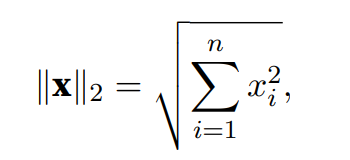

In [ ]:
u = torch.tensor([3.0, -4.0])
torch.norm(u)


tensor(5.)

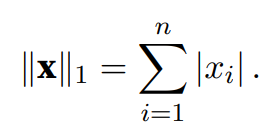

In [ ]:
torch.abs(u).sum()


tensor(7.)

Analogous to L2 norms of vectors, the Frobenius norm of a matrix X ∈ R
m×n
is the square root of
the sum of the squares of the matrix elements:


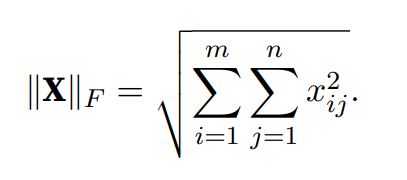

In [ ]:
torch.ones((4, 9))

tensor([[1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1.]])

In [ ]:
torch.norm(torch.ones((4, 9))) # 9 + 9 + 9 + 9 = 36^(1/2) = 6

tensor(6.)

### 2.4.1 Derivatives and Differentiation

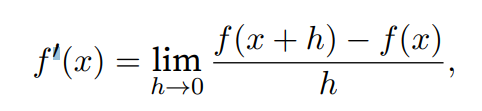

In [ ]:
%matplotlib inline
import numpy as np
from IPython import display
from d2l import torch as d2l

def f(x):
  return 3 * x ** 2 - 4 * x

def numerical_lim(f, x, h):
  return (f(x + h) - f(x)) / h

h = 0.1
for i in range(5):
  print(f'h={h:.5f}, numerical limit={numerical_lim(f, 1, h):.5f}')
  h *= 0.1



h=0.10000, numerical limit=2.30000
h=0.01000, numerical limit=2.03000
h=0.00100, numerical limit=2.00300
h=0.00010, numerical limit=2.00030
h=0.00001, numerical limit=2.00003


In [ ]:
def use_svg_display(): 
  """Use the svg format to display a plot in Jupyter."""
  display.set_matplotlib_formats('svg')

def set_figsize(figsize=(3.5, 2.5)): 
  """Set the figure size for matplotlib."""
  use_svg_display()
  d2l.plt.rcParams['figure.figsize'] = figsize


def set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend):
  """Set the axes for matplotlib."""
  axes.set_xlabel(xlabel)
  axes.set_ylabel(ylabel)
  axes.set_xscale(xscale)
  axes.set_yscale(yscale)
  axes.set_xlim(xlim)
  axes.set_ylim(ylim)
  if legend:
    axes.legend(legend)
  axes.grid()


def plot(
    X, 
    Y=None, 
    xlabel=None, 
    ylabel=None, 
    legend=None, 
    xlim=None,
    ylim=None, 
    xscale='linear', 
    yscale='linear',
    fmts=('-', 'm--', 'g-.', 'r:'), 
    figsize=(3.5, 2.5), 
    axes=None
  ):
  """Plot data points."""
  
  if legend is None:
    legend = []

  set_figsize(figsize)

  axes = axes if axes else d2l.plt.gca()
  # Return True if `X` (tensor or list) has 1 axis
  def has_one_axis(X):
    return (hasattr(X, "ndim") and X.ndim == 1 or
      isinstance(X, list) and not hasattr(X[0], "__len__"))
    
  if has_one_axis(X):
    X = [X]
  
  if Y is None:
    X, Y = [[]] * len(X), X
  elif has_one_axis(Y):
    Y = [Y]
  if len(X) != len(Y):
    X = X * len(Y)
  axes.cla()
  for x, y, fmt in zip(X, Y, fmts):
    if len(x):
      axes.plot(x, y, fmt)
    else:
      axes.plot(y, fmt)
  set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend)

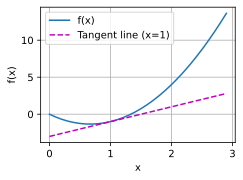

In [ ]:
x = np.arange(0, 3, 0.1)
plot(x, [f(x), 2 * x - 3], 'x', 'f(x)', legend=['f(x)', 'Tangent line (x=1)'])


### 2.5.1 A Simple Example

In [ ]:
import torch
x = torch.arange(4.0)
x

tensor([0., 1., 2., 3.])

In [ ]:
x.requires_grad_(True) # Same as `x = torch.arange(4.0, requires_grad=True)`
x.grad

In [ ]:
y = 2 * torch.dot(x, x)
y

tensor(28., grad_fn=<MulBackward0>)

In [ ]:
y.backward()
x.grad

tensor([ 0.,  4.,  8., 12.])

In [ ]:
x.grad == 4 * x

tensor([True, True, True, True])

In [ ]:
x.grad.zero_()
y = x.sum()
y.backward()
x.grad

tensor([1., 1., 1., 1.])

### 2.5.3 Detaching Computation

In [ ]:
x.grad.zero_()
y = x * x
u = y.detach()
z = u * x

z.sum().backward()
x.grad == u

tensor([True, True, True, True])

In [ ]:
x.grad.zero_()
y.sum().backward()
x.grad == 2 * x

tensor([True, True, True, True])

## Linear Neural Networks

### Linear regression

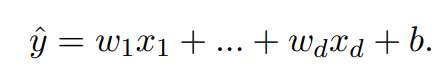

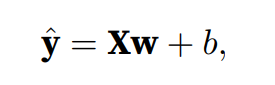

### Loss function

$$
l^i(w, b) = 1/2  (ŷ^i - y^i)^2
$$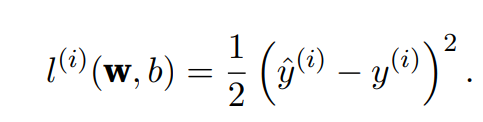

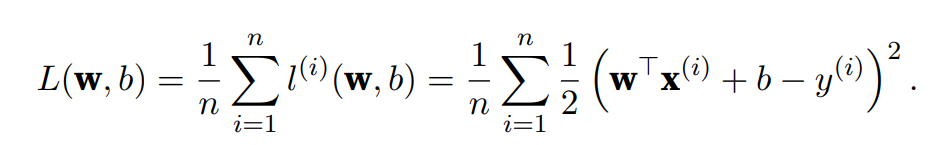

### Minibatch Stochastic Gradient Descent

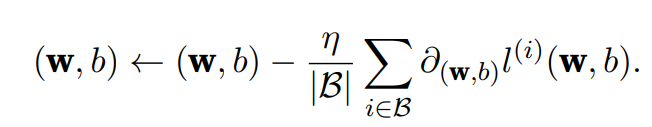

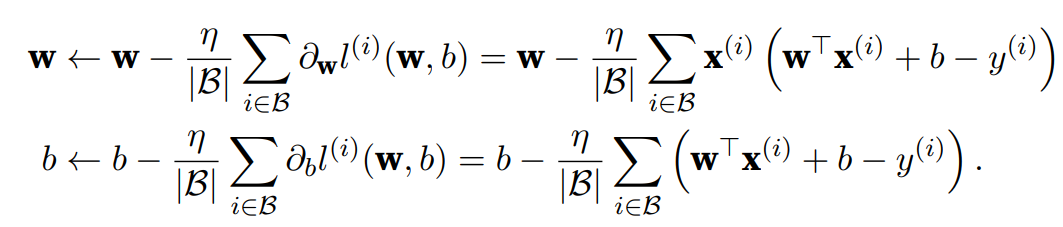

### 3.1.3 The Normal Distribution and Squared Loss

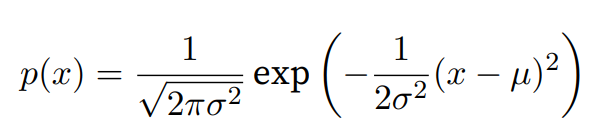

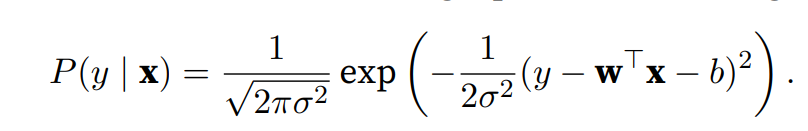

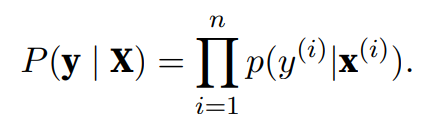

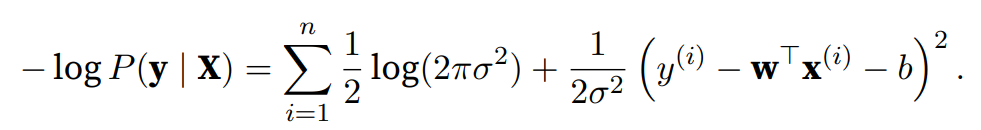

## 3.2 Linear Regression Implementation from Scratch

In [ ]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

### 3.2.1 Generating the Dataset

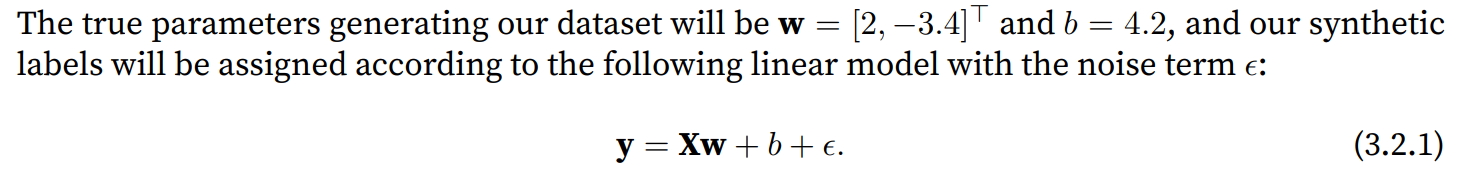

In [ ]:
def synthetic_data(w, b, num_examples): 
  """Generate y = Xw + b + noise."""
  X = torch.normal(0, 1, (num_examples, len(w)))
  y = torch.matmul(X, w) + b
  y += torch.normal(0, 0.01, y.shape)
  
  return X, y.reshape((-1, 1))


true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

print('features:', features[0], 'label:', labels[0])

features: tensor([0.9285, 0.3799]) label: tensor([4.7654])


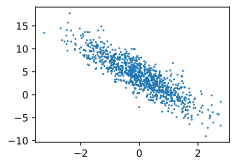

In [ ]:
d2l.set_figsize()
# The semicolon is for displaying the plot only
d2l.plt.scatter(features[:, 1].detach().numpy(), labels.detach().numpy(), 1);


### 3.2.2 Reading the Dataset

In [ ]:
def data_iter(batch_size, features, labels):
  num_examples = len(features)
  indices = list(range(num_examples))
  # The examples are read at random, in no particular order
  random.shuffle(indices)
  for i in range(0, num_examples, batch_size):
    batch_indices = torch.tensor(indices[i:min(i + batch_size, num_examples)])
    yield features[batch_indices], labels[batch_indices]

batch_size = 10
for X, y in data_iter(batch_size, features, labels):
  print(X, '\n', y)
  print(X.shape, y.shape)
  break


tensor([[ 0.2597, -0.9266],
        [-2.0617,  0.5327],
        [-1.0842,  1.5877],
        [ 0.6119, -0.1781],
        [-0.6866, -1.5833],
        [-1.4905,  0.0089],
        [ 1.6595, -0.4249],
        [ 0.7605, -1.9571],
        [-0.3672,  0.7475],
        [ 0.3613, -0.3596]]) 
 tensor([[ 7.8772],
        [-1.7171],
        [-3.3641],
        [ 6.0188],
        [ 8.2062],
        [ 1.1718],
        [ 8.9757],
        [12.3893],
        [ 0.9161],
        [ 6.1462]])
torch.Size([10, 2]) torch.Size([10, 1])


### 3.2.3 Initializing Model Parameters

In [ ]:
w = torch.normal(0, 0.01, size=(2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

def linreg(X, w, b):
  """Linear regression model"""
  return torch.mm(X, w) + b

def squared_loss(y_hat, y):
  """Squared loss."""
  return (y_hat - y.reshape(y_hat.shape))**2 / 2

def sgd(params, lr, batch_size):
  """Minibatch stochastic gradient descent."""
  with torch.no_grad():
    for param in params:
      param -= lr * param.grad / batch_size
      param.grad.zero_()




In [ ]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
  for X, y in data_iter(batch_size, features, labels):
    l = loss(net(X, w, b), y)
    l.sum().backward()
    sgd([w, b], lr, batch_size)
    with torch.no_grad():
      train_l = loss(net(features, w, b), labels)
      print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')


epoch 1, loss 0.000051
epoch 1, loss 0.000051
epoch 1, loss 0.000051
epoch 1, loss 0.000051
epoch 1, loss 0.000051
epoch 1, loss 0.000051
epoch 1, loss 0.000051
epoch 1, loss 0.000051
epoch 1, loss 0.000051
epoch 1, loss 0.000051
epoch 1, loss 0.000051
epoch 1, loss 0.000051
epoch 1, loss 0.000051
epoch 1, loss 0.000051
epoch 1, loss 0.000051
epoch 1, loss 0.000051
epoch 1, loss 0.000051
epoch 1, loss 0.000051
epoch 1, loss 0.000051
epoch 1, loss 0.000051
epoch 1, loss 0.000051
epoch 1, loss 0.000051
epoch 1, loss 0.000051
epoch 1, loss 0.000051
epoch 1, loss 0.000051
epoch 1, loss 0.000051
epoch 1, loss 0.000051
epoch 1, loss 0.000051
epoch 1, loss 0.000051
epoch 1, loss 0.000051
epoch 1, loss 0.000051
epoch 1, loss 0.000051
epoch 1, loss 0.000051
epoch 1, loss 0.000051
epoch 1, loss 0.000051
epoch 1, loss 0.000051
epoch 1, loss 0.000051
epoch 1, loss 0.000051
epoch 1, loss 0.000051
epoch 1, loss 0.000051
epoch 1, loss 0.000051
epoch 1, loss 0.000051
epoch 1, loss 0.000051
epoch 1, lo

In [ ]:
print(f'error in estimating w: {true_w - w.reshape(true_w.shape)}')
print(f'error in estimating b: {true_b - b}')

## 3.3 Concise Implementation of Linear Regression

In [ ]:
import numpy as np
import torch
from torch.utils import data
from d2l import torch as d2l

true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = d2l.synthetic_data(true_w, true_b, 1000)

def load_array(data_arrays, batch_size, is_train=True): 
  """Construct a PyTorch data iterator."""
  dataset = data.TensorDataset(*data_arrays)
  return data.DataLoader(dataset, batch_size, shuffle=is_train)


batch_size = 10
data_iter = load_array((features, labels), batch_size)



In [ ]:
next(iter(data_iter))

[tensor([[ 1.1645,  1.2870],
         [ 0.3559,  1.2531],
         [-1.1781, -0.3073],
         [-1.1100,  0.3726],
         [-0.5638,  1.2306],
         [-0.3827,  0.1414],
         [-0.4776, -0.2533],
         [-1.5454, -0.9037],
         [-1.7768,  0.8741],
         [ 2.3078, -1.9043]]), tensor([[ 2.1578],
         [ 0.6449],
         [ 2.8978],
         [ 0.6992],
         [-1.1176],
         [ 2.9832],
         [ 4.1230],
         [ 4.1796],
         [-2.3285],
         [15.2839]])]

In [ ]:
from torch import nn

net = nn.Sequential(nn.Linear(2, 1))

### 3.3.4 Initializing Model Parameters

In [ ]:
net

Sequential(
  (0): Linear(in_features=2, out_features=1, bias=True)
)

In [ ]:
net[0].weight.data.normal_(0, 0.01)
net[0].bias.data.fill_(0)

tensor([0.])

### 3.3.5 Defining the Loss Function

In [ ]:
[item for item in net.parameters()]

[Parameter containing:
 tensor([[ 1.9997, -3.4001]], requires_grad=True), Parameter containing:
 tensor([4.1995], requires_grad=True)]

In [ ]:
# loss = nn.MSELoss(reduction='sum')
loss = nn.HuberLoss()
trainer = torch.optim.SGD(net.parameters(), lr=0.03)

num_epochs = 3
for epoch in range(num_epochs):
  for X, y in data_iter:
    l = loss(net(X), y)
    # print()
    trainer.zero_grad()
    l.backward()
    trainer.step()
    # print(net[0].weight.grad)
    l = loss(net(features), labels)
    print(f'epoch {epoch + 1}, loss {l/y.shape[0]:f}')

epoch 1, loss 0.000006
epoch 1, loss 0.000006
epoch 1, loss 0.000006
epoch 1, loss 0.000006
epoch 1, loss 0.000006
epoch 1, loss 0.000006
epoch 1, loss 0.000006
epoch 1, loss 0.000006
epoch 1, loss 0.000005
epoch 1, loss 0.000005
epoch 1, loss 0.000005
epoch 1, loss 0.000005
epoch 1, loss 0.000005
epoch 1, loss 0.000005
epoch 1, loss 0.000005
epoch 1, loss 0.000005
epoch 1, loss 0.000005
epoch 1, loss 0.000005
epoch 1, loss 0.000005
epoch 1, loss 0.000005
epoch 1, loss 0.000005
epoch 1, loss 0.000005
epoch 1, loss 0.000005
epoch 1, loss 0.000005
epoch 1, loss 0.000005
epoch 1, loss 0.000005
epoch 1, loss 0.000005
epoch 1, loss 0.000005
epoch 1, loss 0.000005
epoch 1, loss 0.000005
epoch 1, loss 0.000005
epoch 1, loss 0.000005
epoch 1, loss 0.000005
epoch 1, loss 0.000005
epoch 1, loss 0.000005
epoch 1, loss 0.000005
epoch 1, loss 0.000005
epoch 1, loss 0.000005
epoch 1, loss 0.000005
epoch 1, loss 0.000005
epoch 1, loss 0.000005
epoch 1, loss 0.000005
epoch 1, loss 0.000005
epoch 1, lo

In [ ]:
w = net[0].weight.data
print('error in estimating w:', true_w - w.reshape(true_w.shape))
b = net[0].bias.data
print('error in estimating b:', true_b - b)

error in estimating w: tensor([ 0.0004, -0.0007])
error in estimating b: tensor([0.0003])


## 3.4 Softmax Regression

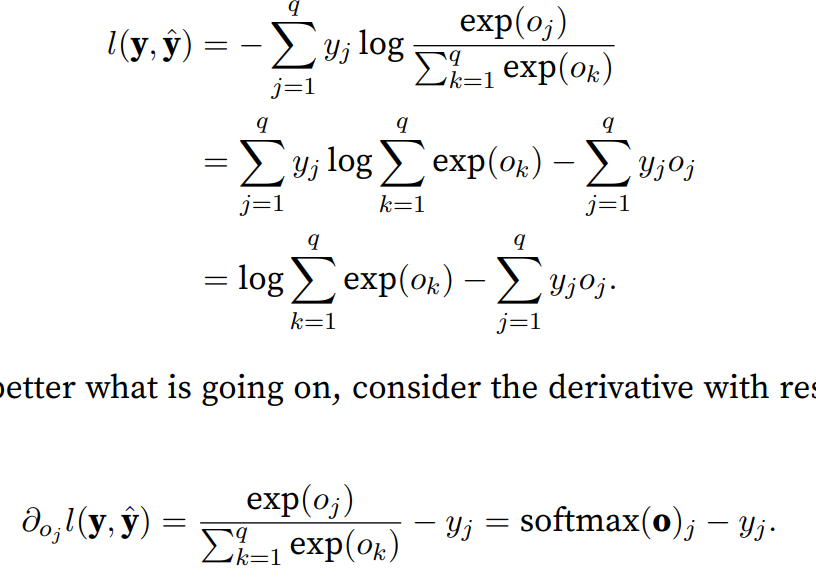

## 3.5 The Image Classification Dataset

In [ ]:
%matplotlib inline
import torch
import torchvision
from torch.utils import data
from torchvision import transforms
from d2l import torch as d2l
d2l.use_svg_display()


trans = transforms.ToTensor()

mnist_train = torchvision.datasets.FashionMNIST(
    root="./data", 
    train=True, 
    transform=trans,
    download=True
)

mnist_test = torchvision.datasets.FashionMNIST(
    root="./data", 
    train=False,
    transform=trans, 
    download=True
)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



In [ ]:
len(mnist_train), len(mnist_test)


(60000, 10000)

In [ ]:
mnist_train[0][0].shape

torch.Size([1, 28, 28])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f4a5b5a4b90>,
      dtype=object)

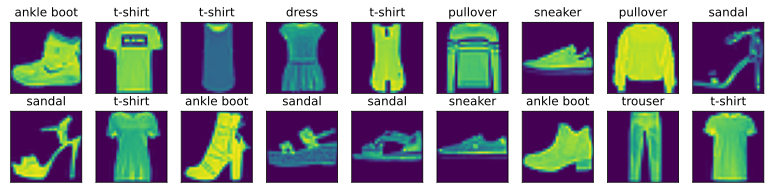

In [ ]:
def get_fashion_mnist_labels(labels): 
  """Return text labels for the Fashion-MNIST dataset."""
  text_labels = [
  't-shirt', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt',
  'sneaker', 'bag', 'ankle boot']
  return [text_labels[int(i)] for i in labels]


def show_images(imgs, 
                num_rows, 
                num_cols, 
                titles=None, 
                scale=1.5
  ):
  """Plot a list of images."""
  figsize = (num_cols * scale, num_rows * scale)
  _, axes = d2l.plt.subplots(num_rows, num_cols, figsize=figsize)
  axes = axes.flatten()
  for i, (ax, img) in enumerate(zip(axes, imgs)):
    if torch.is_tensor(img):
    # Tensor Image
      ax.imshow(img.numpy())
    else:
    # PIL Image
      ax.imshow(img)
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    if titles:
      ax.set_title(titles[i])
  return axes

X, y = next(iter(data.DataLoader(mnist_train, batch_size=18)))
show_images(X.reshape(18, 28, 28), 2, 9, titles=get_fashion_mnist_labels(y))

In [ ]:
batch_size = 256
def get_dataloader_workers(): 
  """Use 4 processes to read the data."""
  return 4
train_iter = data.DataLoader(
    mnist_train, 
    batch_size, 
    shuffle=True,
    num_workers=get_dataloader_workers()
)

timer = d2l.Timer()
for X, y in train_iter:
  continue
f'{timer.stop():.2f} sec'

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


'5.12 sec'

In [ ]:
def load_data_fashion_mnist(batch_size, resize=None): 
  """Download the Fashion-MNIST dataset and then load it into memory."""
  trans = [transforms.ToTensor()]
  if resize:
    trans.insert(0, transforms.Resize(resize))
  trans = transforms.Compose(trans)
  mnist_train = torchvision.datasets.FashionMNIST(
      root="./data",
      train=True,
      transform=trans,
      download=True
  )

  mnist_test = torchvision.datasets.FashionMNIST(
      root="./data",
      train=False,
      transform=trans,
      download=True
  )
  return (data.DataLoader(
              mnist_train, 
              batch_size, 
              shuffle=True,
              num_workers=get_dataloader_workers()),
          data.DataLoader(
              mnist_test, 
              batch_size, 
              shuffle=False,
              num_workers=get_dataloader_workers())
          )


train_iter, test_iter = load_data_fashion_mnist(32, resize=64)
for X, y in train_iter:
  print(X.shape, X.dtype, y.shape, y.dtype)
  break

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


torch.Size([32, 1, 64, 64]) torch.float32 torch.Size([32]) torch.int64


## 3.6 Implementation of Softmax Regression from Scratch

In [ ]:
import torch
from IPython import display
from d2l import torch as d2l

batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)


num_inputs = 28*28
num_outputs = 10
W = torch.normal(0, 0.01, size=(num_inputs, num_outputs), requires_grad=True)
b = torch.zeros(num_outputs, requires_grad=True)


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [ ]:
X = torch.tensor([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
X.sum(0, keepdim=True), X.sum(1, keepdim=True)

(tensor([[5., 7., 9.]]), tensor([[ 6.],
         [15.]]))

In [ ]:
X

tensor([[1., 2., 3.],
        [4., 5., 6.]])

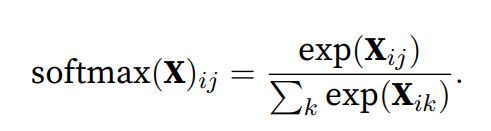

In [ ]:
def softmax(X):
  X_exp = torch.exp(X)
  partition = X_exp.sum(1, keepdim=True)
  return X_exp / partition

X = torch.normal(0, 1, (2, 5))
X_prob = softmax(X)
X_prob, X_prob.sum(1)

(tensor([[0.1108, 0.1976, 0.5307, 0.0404, 0.1205],
         [0.1496, 0.4202, 0.0735, 0.3105, 0.0461]]), tensor([1.0000, 1.0000]))

In [ ]:
def net(X):
  return softmax(torch.matmul(X.reshape((-1, W.shape[0])), W) + b)

y = torch.tensor([0, 2])
y_hat = torch.tensor([[0.1, 0.3, 0.6], [0.3, 0.2, 0.5]])
y_hat[[0, 1], y]


tensor([0.1000, 0.5000])

In [ ]:
y_hat

tensor([[0.1000, 0.3000, 0.6000],
        [0.3000, 0.2000, 0.5000]])

In [ ]:
y_hat[0, 1], y_hat[[0, 1], [0, 1]]

(tensor(0.3000), tensor([0.1000, 0.2000]))

In [ ]:
def cross_entropy(y_hat, y):
  return -torch.log(y_hat[range(len(y_hat)), y])
cross_entropy(y_hat, y)

tensor([2.3026, 0.6931])

In [ ]:
def accuracy(y_hat, y): 
  """Compute the number of correct predictions."""
  if len(y_hat.shape) > 1 and y_hat.shape[1] > 1:
    y_hat = y_hat.argmax(axis=1)
  
  cmp = y_hat.type(y.dtype) == y
  return float(cmp.type(y.dtype).sum())

accuracy(y_hat, y) / len(y)

0.5

In [ ]:
def evaluate_accuracy(net, data_iter): 
  """Compute the accuracy for a model on a dataset."""
  if isinstance(net, torch.nn.Module):
    net.eval() # Set the model to evaluation mode
  metric = Accumulator(2) # No. of correct predictions, no. of predictions
  with torch.no_grad():
    for X, y in data_iter:
      metric.add(accuracy(net(X), y), y.numel())
  return metric[0] / metric[1]


class Accumulator:
  """For accumulating sums over `n` variables."""
  def __init__(self, n):
    self.data = [0.0] * n

  def add(self, *args):
    self.data = [a + float(b) for a, b in zip(self.data, args)]

  def reset(self):
    self.data = [0.0] * len(self.data)

  def __getitem__(self, idx):
    return self.data[idx]

# возможно стоит исследовать данные на тип распределения, чтобы без обучения уже 
# угадать значения датасета, воможно это ускорит обучение сети
evaluate_accuracy(net, test_iter)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


0.1351

In [ ]:
def train_epoch_ch3(net, train_iter, loss, updater):
  """The training loop defined in Chapter 3."""
  # Set the model to training mode
  if isinstance(net, torch.nn.Module):
    net.train()

  # Sum of training loss, sum of training accuracy, no. of examples
  metric = Accumulator(3)
  for X, y in train_iter:
    # Compute gradients and update parameters
    y_hat = net(X)
    l = loss(y_hat, y)

    if isinstance(updater, torch.optim.Optimizer):
      # Using PyTorch in-built optimizer & loss criterion
      updater.zero_grad()
      l.backward()
      updater.step()
      metric.add(float(l) * len(y), accuracy(y_hat, y), y.numel())
    else:
      # Using custom built optimizer & loss criterion
      l.sum().backward()
      updater(X.shape[0])
      metric.add(float(l.sum()), accuracy(y_hat, y), y.numel())
    # Return training loss and training accuracy
  return metric[0] / metric[2], metric[1] / metric[2]


class Animator:  
  """For plotting data in animation."""
  def __init__(self, xlabel=None, ylabel=None, legend=None, xlim=None,
                ylim=None, xscale='linear', yscale='linear',
                fmts=('-', 'm--', 'g-.', 'r:'), nrows=1, ncols=1,
                figsize=(3.5, 2.5)):
    # Incrementally plot multiple lines
    if legend is None:
        legend = []
    d2l.use_svg_display()
    self.fig, self.axes = d2l.plt.subplots(nrows, ncols, figsize=figsize)
    if nrows * ncols == 1:
        self.axes = [self.axes,]
    # Use a lambda function to capture arguments
    self.config_axes = lambda: d2l.set_axes(self.axes[
        0], xlabel, ylabel, xlim, ylim, xscale, yscale, legend)
    self.X, self.Y, self.fmts = None, None, fmts

  def add(self, x, y):
    # Add multiple data points into the figure
    if not hasattr(y, "__len__"):
        y = [y]
    n = len(y)
    if not hasattr(x, "__len__"):
        x = [x] * n
    if not self.X:
        self.X = [[] for _ in range(n)]
    if not self.Y:
        self.Y = [[] for _ in range(n)]
    for i, (a, b) in enumerate(zip(x, y)):
        if a is not None and b is not None:
            self.X[i].append(a)
            self.Y[i].append(b)
    self.axes[0].cla()
    for x, y, fmt in zip(self.X, self.Y, self.fmts):
        self.axes[0].plot(x, y, fmt)
    self.config_axes()
    display.display(self.fig)
    display.clear_output(wait=True)


def train_ch3(
    net, 
    train_iter, 
    test_iter, 
    loss, 
    num_epochs, 
    updater
  ): 
  """Train a model (defined in Chapter 3)."""
  animator = Animator(xlabel='epoch', xlim=[1, num_epochs], ylim=[0.3, 0.9],
                      legend=['train loss', 'train acc', 'test acc'])
  
  for epoch in range(num_epochs):
      train_metrics = train_epoch_ch3(net, train_iter, loss, updater)
      test_acc = evaluate_accuracy(net, test_iter)
      animator.add(epoch + 1, train_metrics + (test_acc,))
  train_loss, train_acc = train_metrics

  assert train_loss < 0.5, train_loss
  assert train_acc <= 1 and train_acc > 0.7, train_acc
  assert test_acc <= 1 and test_acc > 0.7, test_acc


def updater(batch_size):
  lr = 0.1
  return d2l.sgd([W, b], lr, batch_size)

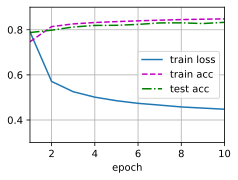

In [ ]:
num_epochs = 10
train_ch3(net, train_iter, test_iter, cross_entropy, num_epochs, updater)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


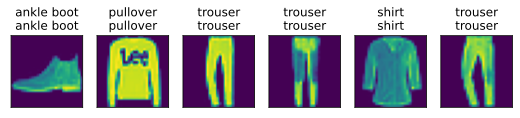

In [ ]:
def predict_ch3(net, test_iter, n=6):  
  """Predict labels (defined in Chapter 3)."""
  for X, y in test_iter:
      break
  trues = d2l.get_fashion_mnist_labels(y)
  preds = d2l.get_fashion_mnist_labels(net(X).argmax(axis=1))
  titles = [true + '\n' + pred for true, pred in zip(trues, preds)]
  d2l.show_images(X[0:n].reshape((n, 28, 28)), 1, n, titles=titles[0:n])

predict_ch3(net, test_iter)

In [ ]:
torch.exp(torch.tensor(50))

tensor(5.1847e+21)

## 3.7. Concise Implementation of Softmax Regression

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


tensor([[-0.0175, -0.2748,  0.0871,  ...,  0.1017, -0.1663, -0.0089],
        [ 0.0454, -0.1096,  0.0451,  ...,  0.0537, -0.0104, -0.0184],
        [ 0.1012, -0.1617,  0.0333,  ...,  0.1220, -0.1477, -0.0524],
        ...,
        [-0.0052,  0.0153, -0.0164,  ...,  0.0735,  0.0105,  0.0957],
        [ 0.0593, -0.0530, -0.0269,  ...,  0.0535, -0.0794,  0.0907],
        [-0.0462,  0.0101,  0.0556,  ...,  0.0379, -0.0412,  0.0793]],
       grad_fn=<AddmmBackward0>) tensor([0, 0, 0, 8, 0, 4, 3, 4, 8, 2, 7, 0, 4, 3, 3, 5, 4, 5, 4, 7, 1, 7, 3, 7,
        2, 6, 0, 4, 6, 1, 0, 6, 3, 6, 3, 4, 1, 1, 0, 7, 4, 4, 4, 8, 4, 4, 9, 6,
        4, 9, 7, 0, 7, 8, 1, 2, 6, 8, 0, 2, 4, 8, 7, 8, 7, 3, 7, 4, 3, 0, 5, 2,
        3, 1, 3, 6, 5, 7, 0, 7, 6, 6, 5, 4, 2, 1, 2, 0, 8, 9, 6, 7, 2, 2, 5, 8,
        9, 5, 8, 9, 6, 4, 9, 6, 3, 2, 8, 0, 4, 8, 8, 3, 1, 6, 2, 2, 6, 0, 3, 8,
        2, 9, 3, 1, 8, 8, 2, 8, 8, 7, 8, 7, 7, 9, 2, 9, 5, 8, 6, 5, 2, 8, 2, 7,
        8, 4, 3, 5, 3, 5, 9, 5, 5, 6, 6, 4, 6, 6, 5, 

TypeError: ignored

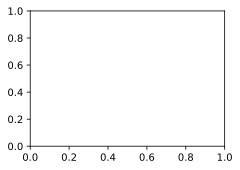

In [ ]:
import torch
from torch import nn
from d2l import torch as d2l

batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

net = nn.Sequential(nn.Flatten(), nn.Linear(784, 10))

def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)

net.apply(init_weights)

loss = nn.CrossEntropyLoss()
trainer = torch.optim.SGD(net.parameters(), lr=0.1)
num_epochs = 10
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

# Multilayer Perceptrons

In [ ]:
%matplotlib inline
import torch
from d2l import torch as d2l

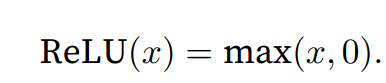

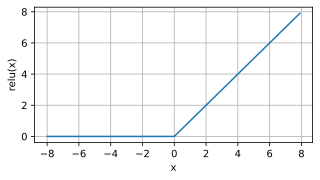

In [ ]:
x = torch.arange(-8.0, 8.0, 0.1, requires_grad=True)
y = torch.relu(x)
d2l.plot(x.detach(), y.detach(), 'x', 'relu(x)', figsize=(5, 2.5))

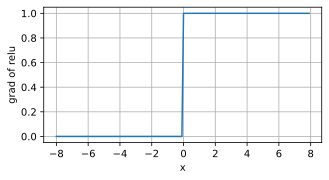

In [ ]:
y.backward(torch.ones_like(x), retain_graph=True)
d2l.plot(x.detach(), x.grad, 'x', 'grad of relu', figsize=(5, 2.5))

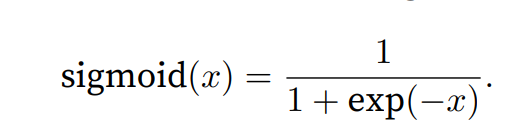

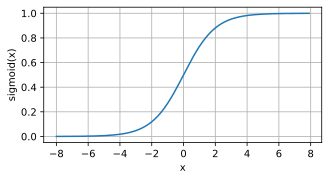

In [ ]:
y = torch.sigmoid(x)
d2l.plot(x.detach(), y.detach(), 'x', 'sigmoid(x)', figsize=(5, 2.5))

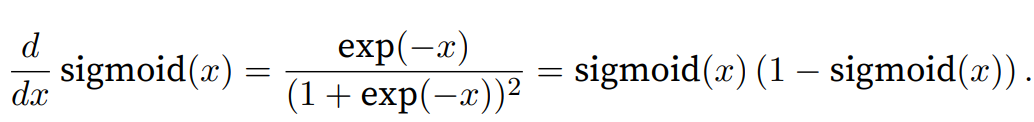

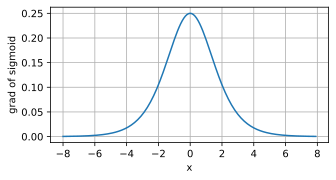

In [ ]:
# Clear out previous gradients
x.grad.data.zero_()
y.backward(torch.ones_like(x), retain_graph=True)
d2l.plot(x.detach(), x.grad, 'x', 'grad of sigmoid', figsize=(5, 2.5))

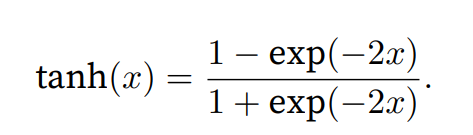

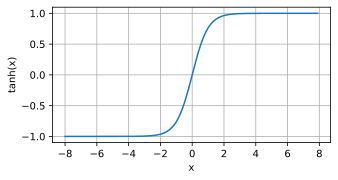

In [ ]:
y = torch.tanh(x)
d2l.plot(x.detach(), y.detach(), 'x', 'tanh(x)', figsize=(5, 2.5))

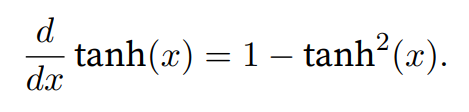

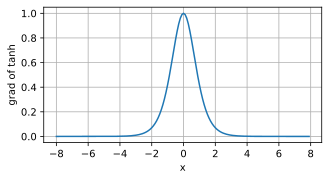

In [ ]:
# Clear out previous gradients.
x.grad.data.zero_()
y.backward(torch.ones_like(x), retain_graph=True)
d2l.plot(x.detach(), x.grad, 'x', 'grad of tanh', figsize=(5, 2.5))

### Поэтому нам необходимо приводить данные к нормальному распредедению если мы используем эти функции активации. Так градиент не будет затухать и будет все хорошо.

### 4.2 Implementation of Multilayer Perceptrons from Scratch

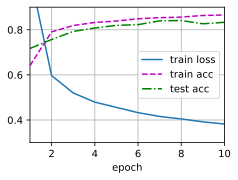

In [ ]:
import torch
from torch import nn
from d2l import torch as d2l

batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

num_inputs, num_outputs, num_hiddens = 784, 10, 256
W1 = nn.Parameter(
    torch.randn(num_inputs, num_hiddens, requires_grad=True) * 0.01)
b1 = nn.Parameter(
    torch.zeros(num_hiddens, requires_grad=True))

W2 = nn.Parameter(
    torch.randn(num_hiddens, num_outputs, requires_grad=True) * 0.01)
b2 = nn.Parameter(
    torch.zeros(num_outputs, requires_grad=True))
params = [W1, b1, W2, b2]

def relu(X):
  a = torch.zeros_like(X)
  return torch.max(X, a)


def net(X):
  X = X.reshape((-1, num_inputs))
  H = relu(X @ W1 + b1) # Here '@' stands for matrix multiplication
  return (H @ W2 + b2)

loss = nn.CrossEntropyLoss()

num_epochs, lr = 10, 0.1
updater = torch.optim.SGD(params, lr=lr)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, updater)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


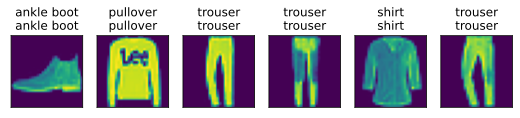

In [ ]:
d2l.predict_ch3(net, test_iter)

### 4.3 Concise Implementation of Multilayer Perceptrons

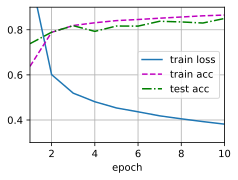

In [ ]:
import torch
from torch import nn
from d2l import torch as d2l


net = nn.Sequential(
    nn.Flatten(), 
    nn.Linear(784, 256), 
    nn.ReLU(),
    nn.Linear(256, 10)
)
def init_weights(m):
  if type(m) == nn.Linear:
    nn.init.normal_(m.weight, std=0.01)

net.apply(init_weights);

batch_size, lr, num_epochs = 256, 0.1, 10
loss = nn.CrossEntropyLoss()
trainer = torch.optim.SGD(net.parameters(), lr=lr)

train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

### 4.4.4 Polynomial Regression

In [3]:
import math
import numpy as np
import torch
from torch import nn
from d2l import torch as d2l

In [ ]:
max_degree = 20 # Maximum degree of the polynomial
n_train, n_test = 100, 100 # Training and test dataset sizes
true_w = np.zeros(max_degree) # Allocate lots of empty space
true_w[0:4] = np.array([5, 1.2, -3.4, 5.6])

features = np.random.normal(size=(n_train + n_test, 1))
np.random.shuffle(features)
poly_features = np.power(features, np.arange(max_degree).reshape(1, -1))

for i in range(max_degree):
  poly_features[:, i] /= math.gamma(i + 1) # `gamma(n)` = (n-1)!

# Shape of `labels`: (`n_train` + `n_test`,)
labels = np.dot(poly_features, true_w)
labels += np.random.normal(scale=0.1, size=labels.shape)

# Convert from NumPy ndarrays to tensors
true_w, features, poly_features, labels = [
torch.tensor(x, dtype=torch.float32)
for x in [true_w, features, poly_features, labels]]

In [7]:
np.power(np.array([1, 2, 3, 4, 5, 6]), np.arange(6))

array([   1,    2,    9,   64,  625, 7776])

In [2]:

def evaluate_loss(net, data_iter, loss): 
  """Evaluate the loss of a model on the given dataset."""
  metric = d2l.Accumulator(2) # Sum of losses, no. of examples
  for X, y in data_iter:
    out = net(X)
    y = y.reshape(out.shape)
    l = loss(out, y)
    metric.add(l.sum(), l.numel())
  return metric[0] / metric[1]


def train(
    train_features, 
    test_features, 
    train_labels, 
    test_labels, 
    num_epochs=400
  ):
  loss = nn.MSELoss()
  input_shape = train_features.shape[-1]
  # Switch off the bias since we already catered for it in the polynomial
  # features
  net = nn.Sequential(nn.Linear(input_shape, 1, bias=False))
  batch_size = min(10, train_labels.shape[0])

  train_iter = d2l.load_array((train_features, train_labels.reshape(-1, 1)),
                              batch_size)
  test_iter = d2l.load_array((test_features, test_labels.reshape(-1, 1)),
                             batch_size, 
                             is_train=False)
  
  trainer = torch.optim.SGD(net.parameters(), lr=0.01)
  animator = d2l.Animator(xlabel='epoch', ylabel='loss', yscale='log',
                          xlim=[1, num_epochs], 
                          ylim=[1e-3, 1e2],
                          legend=['train', 'test'])
  
  for epoch in range(num_epochs):
    d2l.train_epoch_ch3(net, train_iter, loss, trainer)
    if epoch == 0 or (epoch + 1) % 20 == 0:
      animator.add(epoch + 1, (evaluate_loss(net, train_iter, loss), evaluate_loss(net, test_iter, loss)))
  print('weight:', net[0].weight.data.numpy())


weight: [[ 5.0079994  1.2016962 -3.4097736  5.6070085]]


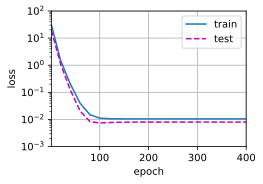

In [8]:
train(poly_features[:n_train, :4], 
      poly_features[n_train:, :4],
      labels[:n_train], labels[n_train:])

weight: [[3.1273906 4.9876814]]


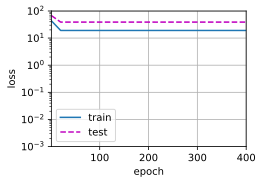

In [ ]:
train(poly_features[:n_train, :2], 
      poly_features[n_train:, :2],
      labels[:n_train], labels[n_train:])

weight: [[ 4.9927678e+00  1.2625028e+00 -3.3238251e+00  5.3685412e+00
  -1.8107669e-01  4.3060747e-01  3.4135422e-01  8.8389292e-02
   1.8382119e-01 -1.5656061e-01  7.0719801e-02 -1.2909195e-01
  -7.7904582e-02 -1.0754073e-01  1.2986845e-01  2.1246971e-01
  -2.0840429e-01 -8.7690622e-02  1.5688202e-01  1.9908218e-04]]


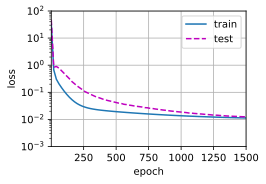

In [ ]:
train(poly_features[:n_train, :], 
      poly_features[n_train:, :],
      labels[:n_train], labels[n_train:], num_epochs=1500)

### 4.5.2 High-Dimensional Linear Regression

In [10]:
%matplotlib inline
import torch
from torch import nn
from d2l import torch as d2l

In [14]:
n_train, n_test, num_inputs, batch_size = 20, 100, 200, 5
true_w, true_b = torch.ones((num_inputs, 1)) * 0.01, 0.05

train_data = d2l.synthetic_data(true_w, true_b, n_train)
train_iter = d2l.load_array(train_data, batch_size)
test_data = d2l.synthetic_data(true_w, true_b, n_test)
test_iter = d2l.load_array(test_data, batch_size, is_train=False)

def init_params():
  w = torch.normal(0, 1, size=(num_inputs, 1), requires_grad=True)
  b = torch.zeros(1, requires_grad=True)
  return [w, b]

def l2_penalty(w):
  return torch.sum(w.pow(2)) / 2


def train(lambd):
  w, b = init_params()
  net, loss = lambda X: d2l.linreg(X, w, b), d2l.squared_loss
  num_epochs, lr = 100, 0.003
  animator = d2l.Animator(xlabel='epochs', ylabel='loss', yscale='log',
  xlim=[5, num_epochs], legend=['train', 'test'])

  for epoch in range(num_epochs):
    for X, y in train_iter:
      l = loss(net(X), y) + lambd * l2_penalty(w)
      l.sum().backward()
      d2l.sgd([w, b], lr, batch_size)
    if (epoch + 1) % 5 == 0:
      animator.add(epoch + 1, (d2l.evaluate_loss(net, train_iter, loss),
                               d2l.evaluate_loss(net, test_iter, loss)))
  
  print('L2 norm of w:', torch.norm(w).item())


L2 norm of w: 13.332427024841309


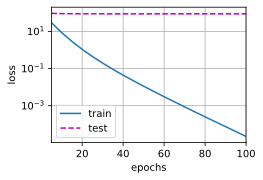

In [15]:
train(lambd=0)

L2 norm of w: 0.39778831601142883


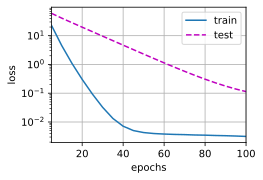

In [16]:
train(lambd=3)

### 4.5.4 Concise Implementation

In [17]:
def train_concise(wd):
  net = nn.Sequential(nn.Linear(num_inputs, 1))
  for param in net.parameters():
    param.data.normal_()
  loss = nn.MSELoss()
  
  num_epochs, lr = 100, 0.003
  # The bias parameter has not decayed
  trainer = torch.optim.SGD([
      {
        "params": net[0].weight,
        "weight_decay": wd
      }, 
      {
        "params": net[0].bias
      }], 
      lr=lr)
  
  animator = d2l.Animator(xlabel='epochs', 
                          ylabel='loss', 
                          yscale='log',
                          xlim=[5, num_epochs], 
                          legend=['train', 'test'])
  
  for epoch in range(num_epochs):
    for X, y in train_iter:
      trainer.zero_grad()
      l = loss(net(X), y)
      l.backward()
      trainer.step()
      if (epoch + 1) % 5 == 0:
        animator.add(epoch + 1, 
                     (d2l.evaluate_loss(net, train_iter, loss),
                      d2l.evaluate_loss(net, test_iter, loss)))
  print('L2 norm of w:', net[0].weight.norm().item())

L2 norm of w: 13.803009986877441


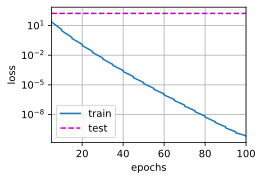

In [18]:
train_concise(0)

In [ ]:
train_concise(3)

### 4.6.4 Dropout implementation from Scratch

In [ ]:
import torch
from torch import nn
from d2l import torch as d2l

# а почему мы зануляем некоторорые компоненты, если например могли бы каждый раз 
# добавлять шум к модели к каждой фиче
def dropout_layer(X, dropout):
  assert 0 <= dropout <= 1
  # In this case, all elements are dropped out
  if dropout == 1:
    return torch.zeros_like(X)
  # In this case, all elements are kept
  if dropout == 0:
    return X
  mask = (torch.rand(X.shape) > dropout).float()
  return mask * X / (1.0 - dropout)